# Plot BedMachine Greenland in Polar Stereographic coordinates

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import netCDF4

In [3]:
# import BedMachine Greenland: https://sites.ps.uci.edu/morlighem/dataproducts/bedmachine-greenland/

nc = netCDF4.Dataset('Data/BedMachineGreenland-2017-09-20.nc') # download data

In [4]:
nc.variables

{'mapping': <class 'netCDF4._netCDF4.Variable'>
 |S1 mapping()
     geoid: eigen-6c4
     false_easting: 0.0
     false_northing: 0.0
     grid_mapping_name: polar_stereographic
     latitude_of_projection_origin: 90.0
     standard_parallel: 70.0
     straight_vertical_longitude_from_pole: -45.0
 unlimited dimensions: 
 current shape = ()
 filling on, default _FillValue of   used,
 'x': <class 'netCDF4._netCDF4.Variable'>
 int32 x(x)
     long_name: Cartesian x-coordinate
     standard_name: projection_x_coordinate
     units: meter
 unlimited dimensions: 
 current shape = (10218,)
 filling on, default _FillValue of -2147483647 used,
 'y': <class 'netCDF4._netCDF4.Variable'>
 int32 y(y)
     long_name: Cartesian y-coordinate
     standard_name: projection_y_coordinate
     units: meter
 unlimited dimensions: 
 current shape = (18346,)
 filling on, default _FillValue of -2147483647 used,
 'mask': <class 'netCDF4._netCDF4.Variable'>
 int8 mask(y, x)
     long_name: mask (0 = ocean, 1 = 

In [5]:
# get variables
x = nc.variables['x'][:]
y = nc.variables['y'][:]
bed = nc.variables['bed'][:]
surface = nc.variables['surface'][:]
thick = nc.variables['thickness'][:]
mask = nc.variables['mask'][:]

In [6]:
# reshape
bed2d = bed.reshape(18346,10218)
surf2d = surface.reshape(18346,10218)
thick2d = thick.reshape(18346,10218)
mask2d = mask.reshape(18346,10218)

# crop surface where ice thickness is 0
surf2d=surf2d.astype('float')
surf2d[thick2d <= 0] = np.NAN

# remove ocean from bed
#bed2d=bed2d.astype('float')
#bed2d[mask == 0] = np.NAN

Text(0.5, 1.0, 'Study Area')

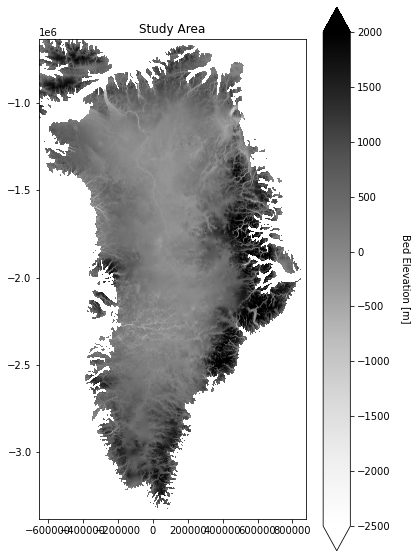

In [71]:
# make bed map
plt.figure(figsize=(6,10))
im = plt.imshow(bed2d, extent = [x.min(), x.max(), y.min(), y.max()], vmin = -2500, vmax = 2000, cmap="Greys")
#cont = plt.contour(bed2d, 0, origin = 'lower', colors = 'k')
cbar = plt.colorbar(im, extend='both')
cbar.set_label("Bed Elevation [m]", rotation=270, labelpad=20)      # add labels to the color bar
#cbar.add_lines(cont)
#plt.subplots_adjust(left=0.0, bottom=0.0, right=2.5, top=.75) # adjust the plot size
plt.title('Study Area')

Text(0.5, 1.0, 'Study Area')

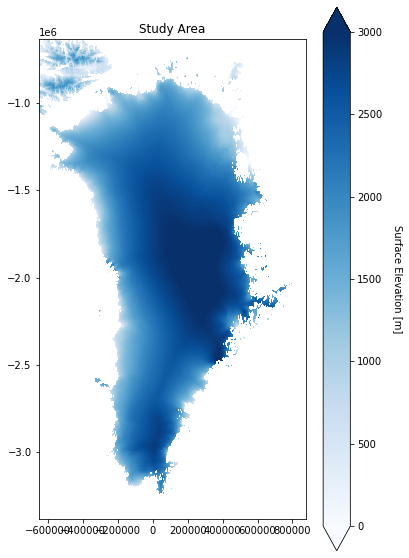

In [62]:
# make surface map
plt.figure(figsize=(6,10))
plt.imshow(surf2d, extent = [x.min(), x.max(), y.min(), y.max()], vmin = 0, vmax = 3000, cmap="Blues")
cbar = plt.colorbar(extend='both')
cbar.set_label("Surface Elevation [m]", rotation=270, labelpad=20)      # add labels to the color bar
#plt.subplots_adjust(left=0.0, bottom=0.0, right=2.5, top=.75) # adjust the plot size
plt.title('Ice coverage')

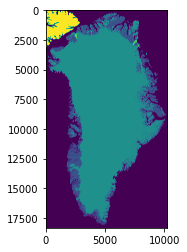

In [72]:
plt.imshow(mask2d)

Text(0.5, 1.0, 'Study Area')

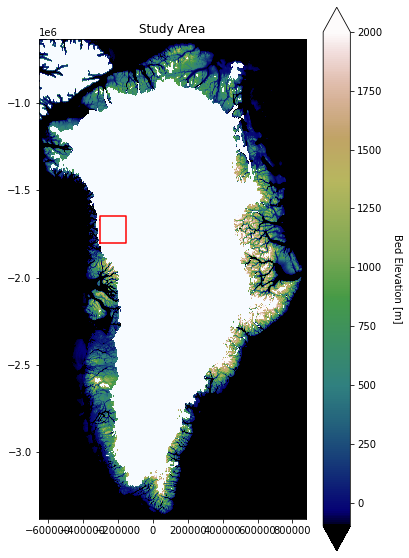

In [7]:
# make bed map
xx = [-3e5, -3e5, -1.5e5, -1.5e5, -3e5]
yy = [-1.8e6, -1.65e6, -1.65e6, -1.8e6, -1.8e6]

fig = plt.figure(figsize=(6,10))
im = plt.imshow(bed2d, extent = [x.min(), x.max(), y.min(), y.max()], vmin = -100, vmax = 2000, cmap="gist_earth")
cbar = plt.colorbar(im, extend='both')
plt.imshow(surf2d, extent = [x.min(), x.max(), y.min(), y.max()], vmin = 3500, vmax = 4000, cmap="Blues")
plt.plot(xx,yy, 'r-')
cbar.set_label("Bed Elevation [m]", rotation=270, labelpad=20)      # add labels to the color bar
plt.title('Study Area')

In [8]:
fig.savefig('greenland_map.jpg', dpi=300, bbox_inches = "tight")